 Load the Data

In [3]:
import pandas as pd

# Load the dataset
loan_data = pd.read_csv('loan.csv')

# Display the first few rows of the dataset
loan_data.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19776\1730218430.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Data Cleaning

In [4]:
# Check for missing values
missing_values = loan_data.isnull().sum()

# Check data types
data_types = loan_data.dtypes

missing_values, data_types

(id                                0
 member_id                         0
 loan_amnt                         0
 funded_amnt                       0
 funded_amnt_inv                   0
                               ...  
 tax_liens                        39
 tot_hi_cred_lim               39717
 total_bal_ex_mort             39717
 total_bc_limit                39717
 total_il_high_credit_limit    39717
 Length: 111, dtype: int64,
 id                              int64
 member_id                       int64
 loan_amnt                       int64
 funded_amnt                     int64
 funded_amnt_inv               float64
                                ...   
 tax_liens                     float64
 tot_hi_cred_lim               float64
 total_bal_ex_mort             float64
 total_bc_limit                float64
 total_il_high_credit_limit    float64
 Length: 111, dtype: object)

In [48]:
# Drop columns with a high percentage of missing values
threshold = 0.4
loan_data = loan_data.loc[:, loan_data.isnull().mean() < threshold]

loan_data.head()


# # Drop the unwanted columns

loan_data = loan_data.drop(columns=["id", "member_id"])

loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,dti_ratio,emp_length_num
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,4.800000,10
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.000000,0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,5.105000,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,4.920000,10
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,26.666667,1


Univariate Analysis

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical variables
numerical_vars = loan_data.select_dtypes(include=['int64', 'float64']).columns
numerical_vars
# for var in numerical_vars:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(loan_data[var], kde=True)
#     plt.title(f'Distribution of {var}')
#     plt.show()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'dti_ratio', 'emp_length_num'],
      dtype='object')

In [50]:
# Plot distributions of categorical variables
categorical_vars = loan_data.select_dtypes(include=['object']).columns
categorical_vars
# for var in categorical_vars:
#     plt.figure(figsize=(10, 4))
#     sns.countplot(y=loan_data[var], order=loan_data[var].value_counts().index)
#     plt.title(f'Distribution of {var}')
#     plt.show()

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

Bivariate Analysis

In [ ]:
# Plot the relationship between numerical variables and loan_status
for var in numerical_vars:
    if var not in ["id", "member_id"]:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=loan_data['loan_status'], y=loan_data[var])
        plt.title(f'{var} vs Loan Status')
        plt.show()

In [ ]:
# Plot the relationship between categorical variables and loan_status
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=loan_data['loan_status'], hue=loan_data[var])
    plt.title(f'{var} vs Loan Status')
    plt.show()

Multivariate Analysis

In [52]:
numeric_data = loan_data.select_dtypes(include=['int64', 'float64'])
numeric_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,dti_ratio,emp_length_num
0,5000,5000,4975.0,162.87,24000.0,27.65,0,1,3,0,...,171.62,0.0,1,0,0.0,0,0.0,0.0,4.800000,10
1,2500,2500,2500.0,59.83,30000.0,1.00,0,5,3,0,...,119.66,0.0,1,0,0.0,0,0.0,0.0,12.000000,0
2,2400,2400,2400.0,84.33,12252.0,8.72,0,2,2,0,...,649.91,0.0,1,0,0.0,0,0.0,0.0,5.105000,10
3,10000,10000,10000.0,339.31,49200.0,20.00,0,1,10,0,...,357.48,0.0,1,0,0.0,0,0.0,0.0,4.920000,10
4,3000,3000,3000.0,67.79,80000.0,17.94,0,0,15,0,...,67.79,0.0,1,0,0.0,0,0.0,0.0,26.666667,1


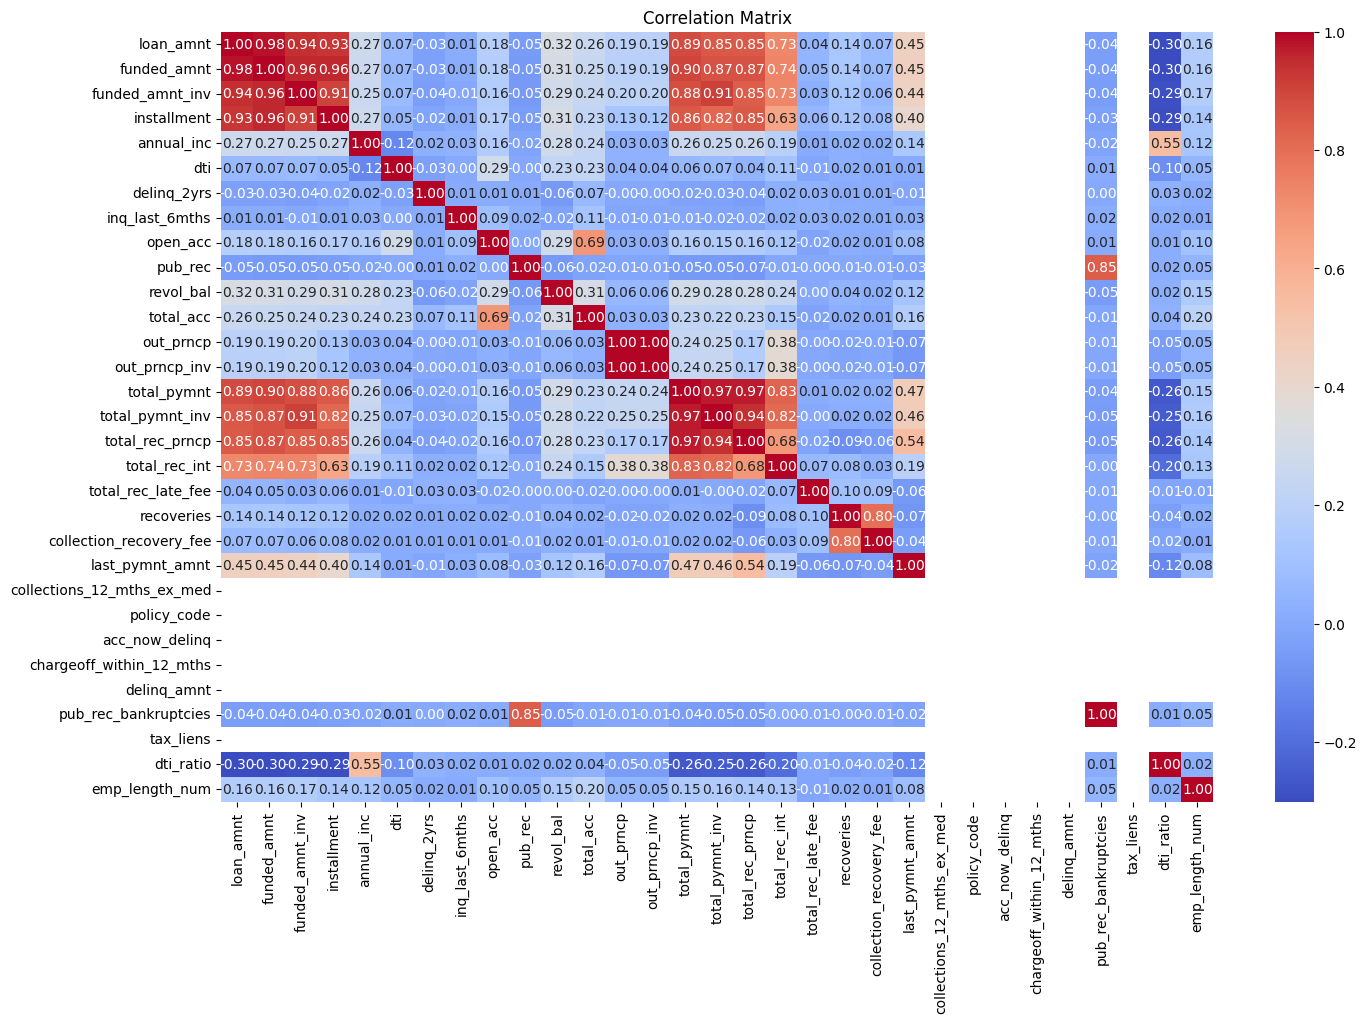

In [53]:
 # Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# # Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [47]:
#Debt-to-Income Ratio
loan_data['dti_ratio'] = loan_data['annual_inc'] / loan_data['loan_amnt']

#loan_data.emp_length.unique()

#Employment Length in Numeric Format


# Function to convert employment length to numeric format
def convert_emp_length(emp_length):
    if pd.isna(emp_length):
        return 0
    elif emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    else:
        return int(emp_length.split()[0])

# Apply the function to create the new column
loan_data['emp_length_num'] = loan_data['emp_length'].apply(convert_emp_length)


loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,dti_ratio,emp_length_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,4.800000,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.000000,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,5.105000,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,4.920000,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,26.666667,1
